<a href="https://colab.research.google.com/github/AndresPautrat/MachineLearning_UPC/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly==3.10.0

     |████████████████████████████████| 41.5MB 110kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import *
import plotly.tools as tls
from google.colab import files
from scipy.stats import zscore
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
fileUp = files.upload()
data_set = pd.read_csv(io.BytesIO(fileUp['confirmed_global.csv']))

Saving confirmed_global.csv to confirmed_global (2).csv


In [ ]:

data_set.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25


In [ ]:
data_set.shape[1]

98

In [ ]:
feactures = []
feactures.append(data_set.columns[1])
for i in range(4,data_set.shape[1]):
  feactures.append(data_set.columns[i])

In [ ]:
#Liempieza de datos 
df = data_set.copy()[feactures]
df = df.drop([231,238])
df.sort_values(by=['4/20/20'], ascending=True)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
263,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
78,China,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
259,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
249,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,...,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999
116,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,...,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233,29155,32964,37575,40174,44550,52128,56989,59105,64338,68605,70478,74390,78167,82048,86334,90676,93790,120633,124298,129257,132473,144944,146923,146906,151808,154188,156921,154715,157026,158636
137,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,...,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994
201,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,...,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,219764


In [ ]:
print("Lost values {}".format(df.isnull().sum()))
print("#####################################")
print("Empty values {}".format(df.isna().sum()))

Lost values Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/20/20           0
4/21/20           0
4/22/20           0
4/23/20           0
4/24/20           0
Length: 95, dtype: int64
#####################################
Empty values Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/20/20           0
4/21/20           0
4/22/20           0
4/23/20           0
4/24/20           0
Length: 95, dtype: int64


In [ ]:
df.iloc[0:,1:] = normalize(df.iloc[0:,1:])

In [ ]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,...,0.005556,0.005821,0.005821,0.005821,0.006350,0.006350,0.010583,0.010583,0.019579,0.022225,0.024871,0.029104,0.029104,0.031750,0.044980,0.046038,0.062707,0.072232,0.074349,0.079111,0.092340,0.097103,0.111920,0.117476,0.128060,0.137849,0.146845,0.160604,0.175950,0.188914,0.207435,0.222252,0.239715,0.246859,0.263528,0.271465,0.288928,0.311153,0.338405,0.357456
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021049,0.022700,0.024351,0.026415,0.028891,0.031367,0.036733,0.042924,0.050766,0.060258,0.071815,0.076768,0.081308,0.087499,0.092039,0.100293,0.106897,0.114326,0.125470,0.137439,0.148995,0.155599,0.158075,0.165092,0.168806,0.171695,0.178712,0.184077,0.192745,0.196046,0.203888,0.213794,0.222461,0.226176,0.231954,0.241034,0.251352,0.261670,0.273640,0.279830
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000096,0.000096,0.000096,0.000096,0.000096,...,0.005206,0.005784,0.007134,0.008387,0.008676,0.013400,0.019377,0.022172,0.025450,0.029113,0.035379,0.039428,0.043766,0.049261,0.056298,0.069023,0.081652,0.095052,0.112886,0.120598,0.127250,0.137179,0.141517,0.151543,0.160605,0.169763,0.175933,0.184512,0.191164,0.199551,0.208227,0.218638,0.233099,0.244281,0.253439,0.262019,0.270984,0.280528,0.289879,0.301447
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000635,0.012377,0.012377,0.016821,0.023803,0.027928,0.035863,0.042210,0.052049,0.059665,0.071091,0.084738,0.097750,0.106001,0.117427,0.119331,0.123774,0.135834,0.139325,0.147894,0.159002,0.166619,0.172966,0.178996,0.185026,0.190739,0.190739,0.202482,0.205021,0.209146,0.213590,0.213590,0.220889,0.223428,0.226284,0.227554,0.227554,0.229458,0.229458,0.231997
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010505,0.021010,0.021010,0.031514,0.031514,0.031514,0.042019,0.042019,0.052524,0.073534,0.073534,0.073534,0.084038,0.084038,0.084038,0.105048,0.147067,0.168077,0.178582,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.252115,0.252115,0.252115,0.252115,0.262620,0.262620,0.262620


In [ ]:
pca = PCA(15)
principal_Components = pca.fit_transform(df.iloc[0:,1:])
df_PCA = pd.DataFrame(data = principal_Components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15'])
df_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-33350.288395,-3167.406726,-594.806404,-301.695299,-0.203012,65.029859,-16.962703,1.257158,-16.874834,-59.045908,-15.144384,-56.279437,14.430365,19.817545,35.866272
1,-34680.778179,-2621.488938,-43.237924,-515.789895,31.673561,131.928717,-53.162725,-29.564559,-21.577391,-54.911467,-20.567470,-58.159995,-21.370840,3.418553,-0.786293
2,-26716.988530,-2987.109058,-236.664137,-598.587969,-62.070017,150.172106,34.732165,-58.534430,-43.682567,-126.282389,42.457360,-64.280891,-91.928978,111.241546,-43.877440
3,-33996.403569,-2463.485587,237.424004,-705.830234,100.775581,88.981306,-82.003006,-25.141950,37.589001,-21.943987,-7.235740,-48.288204,-21.625371,-14.977861,-20.211697
4,-36990.376242,-2827.922821,-233.585012,-571.248296,84.678984,152.909063,-71.750407,-22.020787,0.463021,-34.691216,-8.540048,-54.149804,-17.697970,3.474594,-16.143841


In [ ]:
df_reduction = pd.concat([df_PCA , df[['Country/Region']]], axis=1)
df_reduction.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,Country/Region
0,-33350.288395,-3167.406726,-594.806404,-301.695299,-0.203012,65.029859,-16.962703,1.257158,-16.874834,-59.045908,-15.144384,-56.279437,14.430365,19.817545,35.866272,Afghanistan
1,-34680.778179,-2621.488938,-43.237924,-515.789895,31.673561,131.928717,-53.162725,-29.564559,-21.577391,-54.911467,-20.567470,-58.159995,-21.370840,3.418553,-0.786293,Albania
2,-26716.988530,-2987.109058,-236.664137,-598.587969,-62.070017,150.172106,34.732165,-58.534430,-43.682567,-126.282389,42.457360,-64.280891,-91.928978,111.241546,-43.877440,Algeria
3,-33996.403569,-2463.485587,237.424004,-705.830234,100.775581,88.981306,-82.003006,-25.141950,37.589001,-21.943987,-7.235740,-48.288204,-21.625371,-14.977861,-20.211697,Andorra
4,-36990.376242,-2827.922821,-233.585012,-571.248296,84.678984,152.909063,-71.750407,-22.020787,0.463021,-34.691216,-8.540048,-54.149804,-17.697970,3.474594,-16.143841,Angola


<Figure size 3600x3600 with 0 Axes>

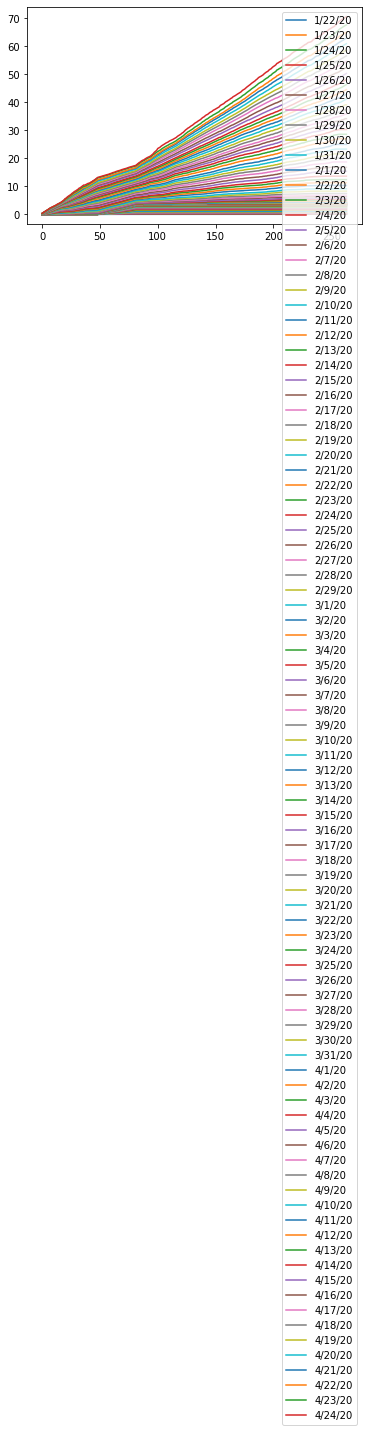

In [ ]:
x = df.iloc[:,:].cumsum()

plt.figure(figsize=(50,50))
x.plot() 
plt.legend(loc = 'best')
plt.show()

In [ ]:
dfff=df[df.duplicated('Country/Region',keep=False)]

dfff=df.groupby('Country/Region').plot(legend=True)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1e6028e158> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f1e5ffb6620> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,...,0.005556,0.005821,0.005821,0.005821,0.006350,0.006350,0.010583,0.010583,0.019579,0.022225,0.024871,0.029104,0.029104,0.031750,0.044980,0.046038,0.062707,0.072232,0.074349,0.079111,0.092340,0.097103,0.111920,0.117476,0.128060,0.137849,0.146845,0.160604,0.175950,0.188914,0.207435,0.222252,0.239715,0.246859,0.263528,0.271465,0.288928,0.311153,0.338405,0.357456
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021049,0.022700,0.024351,0.026415,0.028891,0.031367,0.036733,0.042924,0.050766,0.060258,0.071815,0.076768,0.081308,0.087499,0.092039,0.100293,0.106897,0.114326,0.125470,0.137439,0.148995,0.155599,0.158075,0.165092,0.168806,0.171695,0.178712,0.184077,0.192745,0.196046,0.203888,0.213794,0.222461,0.226176,0.231954,0.241034,0.251352,0.261670,0.273640,0.279830
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000096,0.000096,0.000096,0.000096,0.000096,...,0.005206,0.005784,0.007134,0.008387,0.008676,0.013400,0.019377,0.022172,0.025450,0.029113,0.035379,0.039428,0.043766,0.049261,0.056298,0.069023,0.081652,0.095052,0.112886,0.120598,0.127250,0.137179,0.141517,0.151543,0.160605,0.169763,0.175933,0.184512,0.191164,0.199551,0.208227,0.218638,0.233099,0.244281,0.253439,0.262019,0.270984,0.280528,0.289879,0.301447
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000635,0.012377,0.012377,0.016821,0.023803,0.027928,0.035863,0.042210,0.052049,0.059665,0.071091,0.084738,0.097750,0.106001,0.117427,0.119331,0.123774,0.135834,0.139325,0.147894,0.159002,0.166619,0.172966,0.178996,0.185026,0.190739,0.190739,0.202482,0.205021,0.209146,0.213590,0.213590,0.220889,0.223428,0.226284,0.227554,0.227554,0.229458,0.229458,0.231997
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010505,0.021010,0.021010,0.031514,0.031514,0.031514,0.042019,0.042019,0.052524,0.073534,0.073534,0.073534,0.084038,0.084038,0.084038,0.105048,0.147067,0.168077,0.178582,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.199591,0.252115,0.252115,0.252115,0.252115,0.262620,0.262620,0.262620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000